In [17]:
import yfinance as yf
from yahoo_fin import stock_info as si
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import pandas as pd
from datetime import datetime, timedelta
import pickle
import warnings

warnings.filterwarnings("ignore")

plt.style.use("dark_background")

In [2]:
start_date = datetime.now() - timedelta(days=1)
end_date = datetime.now()

In [3]:
# Stocks
stocks = [
    "AAPL",
    "META",
    "TSLA",
    "ABBV",
    "ASML",
    "NVDA",
    "CCL",
    "BABA",
    "NSRGY",
    "OMV.VI",
    "VYGVQ",
]
amounts = [20, 15, 20, 10, 30, 40, 20, 50, 60, 30, 50]

# Get lastest price
values = [si.get_live_price(stocks[i]) * amounts[i] for i in range(len(stocks))]
# Get sector
sectors = [yf.Ticker(x).get_info()["industry"] for x in stocks]
# Get countries
countries = [yf.Ticker(x).get_info()["country"] for x in stocks]
# Get market cap
market_caps = [yf.Ticker(x).get_info()["marketCap"] for x in stocks]

In [4]:
# ETFS
etfs = ["IVV", "XWD.TO"]
etfs_amounts = [30, 20]

# Get lastest price
etfs_values = [si.get_live_price(etfs[i]) * etfs_amounts[i] for i in range(len(etfs))]

In [5]:
# Crypto
cryptos = ["ETH-USD", "BTC-USD"]
cryptos_amounts = [0.89, 0.34]

# Get lastest price
cryptos_values = [
    si.get_live_price(cryptos[i]) * cryptos_amounts[i] for i in range(len(cryptos))
]

In [6]:
cash = 40_000

In [7]:
# General distributions
general_dist = {
    "Stocks": sum(values),
    "ETFs": sum(etfs_values),
    "Cryptos": sum(cryptos_values),
    "Cash": cash,
}

In [8]:
# Sector distributions
sector_dist = {}
for i in range(len(sectors)):
    if sectors[i] not in sector_dist.keys():
        sector_dist[sectors[i]] = 0
    sector_dist[sectors[i]] += values[i]

In [9]:
# Country distributions
country_dist = {}
for i in range(len(countries)):
    if countries[i] not in country_dist.keys():
        country_dist[countries[i]] = 0
    country_dist[countries[i]] += values[i]

In [10]:
# Market Cap distributions
market_cap_dist = {"small": 0.0, "mid": 0.0, "large": 0.0, "huge": 0.0}
for i in range(len(stocks)):
    if market_caps[i] < 2_000_000_000:
        market_cap_dist["small"] += values[i]
    elif market_caps[i] < 10_000_000_000:
        market_cap_dist["mid"] += values[i]
    elif market_caps[i] < 1_000_000_000_000:
        market_cap_dist["large"] += values[i]
    else:
        market_cap_dist["huge"] += values[i]

In [11]:
with open("stock_portfolio_data/general.pickle", "wb") as f:
    pickle.dump(general_dist, f)
with open("stock_portfolio_data/industry.pickle", "wb") as f:
    pickle.dump(sector_dist, f)
with open("stock_portfolio_data/country.pickle", "wb") as f:
    pickle.dump(country_dist, f)
with open("stock_portfolio_data/market_cap.pickle", "wb") as f:
    pickle.dump(market_cap_dist, f)

In [12]:
# if the above code has already runned

with open("stock_portfolio_data/general.pickle", "rb") as f:
    general_dist = pickle.load(f)
with open("stock_portfolio_data/industry.pickle", "rb") as f:
    industry_dist = pickle.load(f)
with open("stock_portfolio_data/country.pickle", "rb") as f:
    country_dist = pickle.load(f)
with open("stock_portfolio_data/market_cap.pickle", "rb") as f:
    market_cap_dist = pickle.load(f)

In [16]:
# Custom function to format the autopct and control its fontsize
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return "{p:.2f}%\n({v:d})".format(p=pct, v=val)

    return my_format

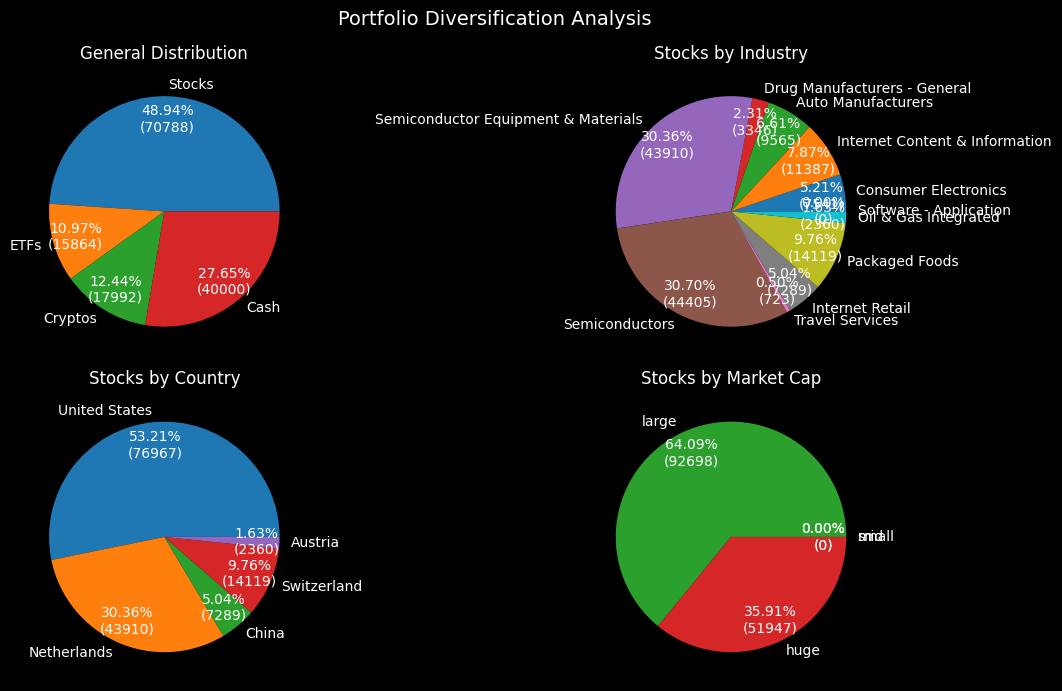

In [24]:
# Decrease the font size for pie chart labels
mpl.rcParams["font.size"] = 10
font_size = 10

fig, axs = plt.subplots(2, 2, figsize=(12, 7))
fig.suptitle("Portfolio Diversification Analysis", fontsize=14)

axs[0, 0].pie(
    general_dist.values(),
    labels=general_dist.keys(),
    autopct=autopct_format(general_dist.values()),
    pctdistance=0.8,
    colors=mcolors.TABLEAU_COLORS,
    textprops={"fontsize": font_size},
)
axs[0, 0].set_title("General Distribution")

axs[0, 1].pie(
    sector_dist.values(),
    labels=sector_dist.keys(),
    autopct=autopct_format(general_dist.values()),
    pctdistance=0.8,
    colors=mcolors.TABLEAU_COLORS,
    textprops={"fontsize": font_size},
)
axs[0, 1].set_title("Stocks by Industry")

axs[1, 0].pie(
    country_dist.values(),
    labels=country_dist.keys(),
    autopct=autopct_format(general_dist.values()),
    pctdistance=0.8,
    colors=mcolors.TABLEAU_COLORS,
    textprops={"fontsize": font_size},
)
axs[1, 0].set_title("Stocks by Country")

axs[1, 1].pie(
    market_cap_dist.values(),
    labels=market_cap_dist.keys(),
    autopct=autopct_format(general_dist.values()),
    pctdistance=0.8,
    colors=mcolors.TABLEAU_COLORS,
    textprops={"fontsize": font_size},
)
axs[1, 1].set_title("Stocks by Market Cap")

plt.tight_layout()

# Save the figure
fig.savefig(
    "figures/portfolio_diversification_analysis.png", dpi=600
)  # Save as a PNG file with high resolution

plt.show()